In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [77]:
dataset = pd.read_csv("train.csv")
num_cols = ['LotArea', 'OverallQual', 'YearBuilt', 'GrLivArea',
                    'GarageCars', 'TotalBsmtSF', '1stFlrSF',]
cat_cols = ['Neighborhood', 'HouseStyle']
selected_cols = num_cols + cat_cols + ['SalePrice']
features = dataset[selected_cols]
x = features.iloc[:, 0:7]
y = features.iloc[:, 7]


features_encoded = pd.get_dummies(features, columns=['Neighborhood', 'HouseStyle'], drop_first=True)
print(features_encoded.head())

In [78]:
print(features.isnull().sum())
print("Shape after encoding:", features_encoded.shape)



LotArea         0
OverallQual     0
YearBuilt       0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
1stFlrSF        0
Neighborhood    0
HouseStyle      0
SalePrice       0
dtype: int64
Shape after encoding: (1460, 39)


In [79]:
print(features.head())

   LotArea  OverallQual  YearBuilt  GrLivArea  GarageCars  TotalBsmtSF  \
0     8450            7       2003       1710           2          856   
1     9600            6       1976       1262           2         1262   
2    11250            7       2001       1786           2          920   
3     9550            7       1915       1717           3          756   
4    14260            8       2000       2198           3         1145   

   1stFlrSF Neighborhood HouseStyle  SalePrice  
0       856      CollgCr     2Story     208500  
1      1262      Veenker     1Story     181500  
2       920      CollgCr     2Story     223500  
3       961      Crawfor     2Story     140000  
4      1145      NoRidge     2Story     250000  


In [80]:
x = features_encoded.drop('SalePrice', axis=1)
y = features_encoded['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1
)

In [81]:
# regressor = LinearRegression()
# regressor.fit(x_train,y_train)
model = RandomForestRegressor(random_state=1)
model.fit(x_train, y_train)
# y_pred = model.predict(x_test)

RandomForestRegressor(random_state=1)

In [82]:
# y_pred = regressor.predict(x_test)
y_pred = model.predict(x_test)

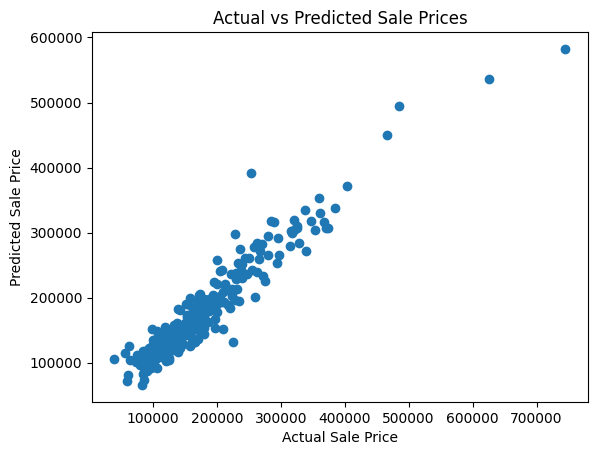

In [83]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Prices")
plt.show()

In [84]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [85]:
# printing the values
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

MAE: 18020.45
MSE: 696981362.70
R² Score: 0.9023


In [86]:
joblib.dump(regressor, "random_forest_model.pkl")

['random_forest_model.pkl']